## Sales prediction
### A sales price prediction dataset with features like "TV," "Radio," "Newspaper," and "Sales" is typically used for predicting sales based on advertising expenditure in various media channels. Here's a description of each feature:

### Dataset:-
#### TV: This feature represents the advertising budget spent on TV advertisements. It indicates how much money was allocated to promoting a product or service through television advertising.

#### Radio: This feature represents the advertising budget spent on radio advertisements. It indicates the amount spent on radio advertising campaigns.

#### Newspaper: This feature represents the advertising budget spent on newspaper advertisements. It indicates the amount allocated for print advertising in newspapers.

#### Sales: The target variable, which represents the sales performance or outcome. It indicates the number of units sold, revenue generated, or another metric of sales success that the model aims to predict.

### The goal is typically to build a predictive model that can estimate the impact of advertising expenditures on sales. The model can help businesses make informed decisions about how much to allocate to each advertising channel to maximize sales.

#### Here are the steps involved in dataset for sales prediction:

### Importing the necessary header files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor

### Reading the dataset

In [3]:
data=pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Data sc/datasets/Advertising.csv")
data.shape

(200, 5)

### Data processing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### Data visualisation

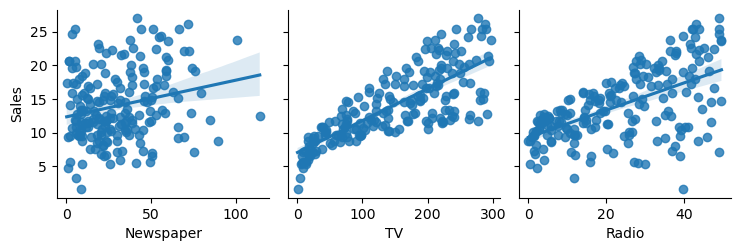

In [19]:
sns.pairplot(data, x_vars=["Newspaper", "TV", "Radio"], y_vars="Sales",kind='reg')

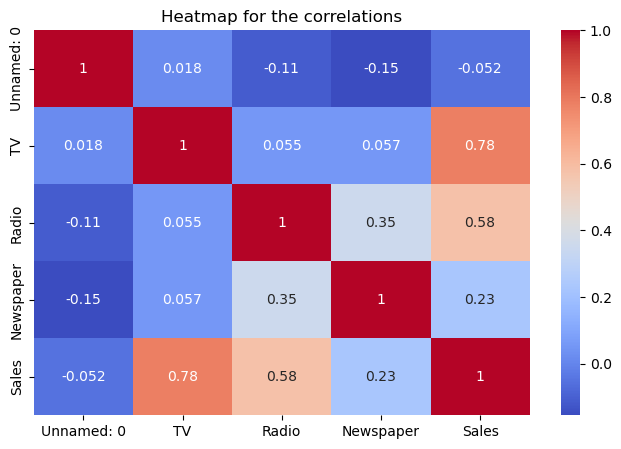

In [22]:
#heatmap
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Heatmap for the correlations")
plt.show()

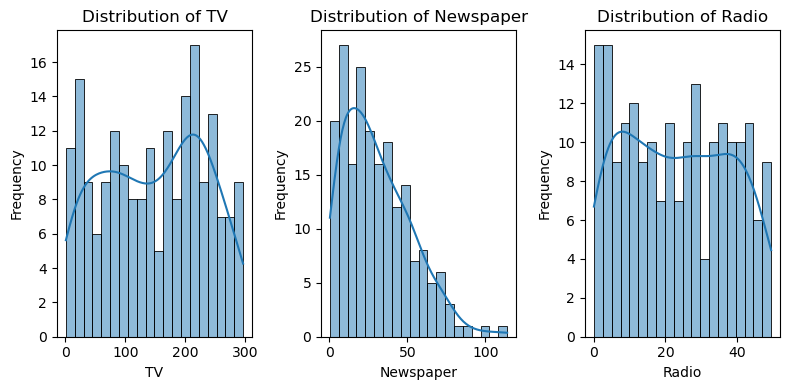

In [31]:
# Define the columns for which you want to create histograms
columns_to_plot = ['TV', 'Newspaper', 'Radio']

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Iterate through the columns and create histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(data=data, x=column, bins=20, kde=True, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {column}')

# Remove any empty subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Training the model using Linear regression 

In [23]:
# Split the data into train and test sets
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 3.17
Root Mean Squared Error: 1.78
R-squared: 0.90


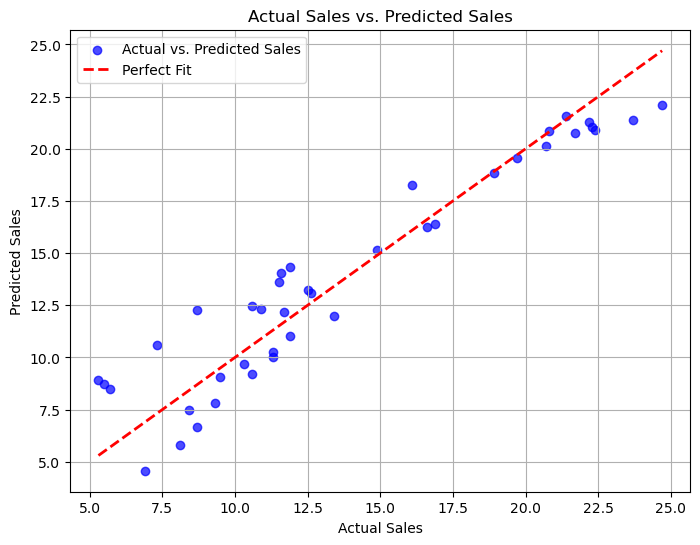

In [27]:
# Visualize the model's predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.7, label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [36]:
# Sample new data with the same feature columns as the original dataset
new_df = pd.DataFrame({
    'TV': [100, 160, 200],
    'Radio': [10, 10, 50],
    'Newspaper': [10, 15, 15]
})

new_predictions = model.predict(new_df[['TV', 'Radio', 'Newspaper']])

# Display the predictions for the new data
print("Predictions for New Data:")
print(new_predictions)


Predictions for New Data:
[ 9.37158077 12.06915739 21.42614026]


### Training the model using random forest

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a Random Forest regression model
# You can adjust hyperparameters as needed (e.g., n_estimators, max_depth, etc.)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Step 4: Train the model on the training set
rf_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.59
R-squared (R2): 0.98


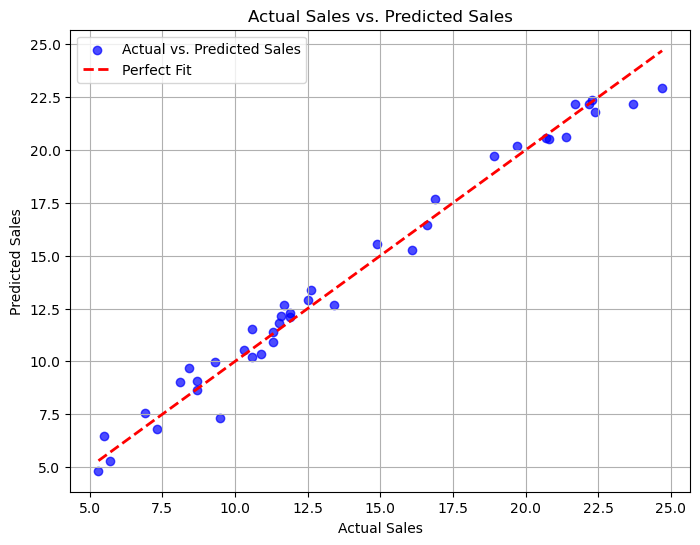

In [33]:
# Visualize the model's predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.7, label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### Random forest gives better result as there are many blue points on and near the red dotted line

In [37]:
# Sample new data with the same feature columns as the original dataset
new_df = pd.DataFrame({
    'TV': [100, 160, 200],
    'Radio': [10, 10, 50],
    'Newspaper': [10, 15, 15]
})

new_predictions = model.predict(new_df[['TV', 'Radio', 'Newspaper']])

# Display the predictions for the new data
print("Predictions for New Data:")
print(new_predictions)

Predictions for New Data:
[ 9.37158077 12.06915739 21.42614026]


### Random forest has R squared value of 0.98 whereas Linear regression has R squared value of 0.90